In [1]:
!pip install deepface tqdm matplotlib
!pip install tensorflow==2.12

In [2]:
from deepface import DeepFace
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

25-04-16 23:17:15 - Directory /root/.deepface has been created
25-04-16 23:17:15 - Directory /root/.deepface/weights has been created


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from deepface import DeepFace
import pandas as pd
from tqdm import tqdm
import os
#đường dẫn đến thư mục chứa ảnh và file repairs.csv trong Google Drive
img_dir = "/content/drive/MyDrive/Colab Notebooks/lfw/lfw-deepfunneled/lfw-deepfunneled"
pairs_file = "/content/drive/MyDrive/Colab Notebooks/lfw/repairs.csv"

df = pd.read_csv(pairs_file, usecols=['name', 'imagenum1', 'imagenum2', 'Unnamed: 3'])
print(df.columns)

Index(['name', 'imagenum1', 'imagenum2', 'Unnamed: 3'], dtype='object')


In [12]:
#positive (900 dòng đầu) và negative (600 dòng sau)
positive_pairs = df.iloc[:900]  # Dòng 1 đến 900
negative_pairs = df.iloc[900:1500]  # Dòng 901 đến 1500

#tạo danh sách path và nhãn
pairs = []
labels = []

#xử lý positive pairs
for _, row in positive_pairs.iterrows():
    name = row['name']
    img1 = f"{img_dir}/{name}/{name}_{int(row['imagenum1']):04d}.jpg"
    img2 = f"{img_dir}/{name}/{name}_{int(row['imagenum2']):04d}.jpg"
    pairs.append((img1, img2, 1))  #gán nhãn 1 cho positive

#xử lý negative pairs
for _, row in negative_pairs.iterrows():
    name1 = row['name']
    img1 = f"{img_dir}/{name1}/{name1}_{int(row['imagenum1']):04d}.jpg"
    name2 = row['imagenum2']
    img2 = f"{img_dir}/{name2}/{name2}_{int(row['Unnamed: 3']):04d}.jpg"
    pairs.append((img1, img2, 0))  #gán nhãn 0 cho negative

#5 mô hình cần đánh giá
models = ["Facenet", "ArcFace", "VGG-Face", "DeepFace", "OpenFace"]

#hàm tính toán độ chính xác (accuracy) cho 1 mô hình
def evaluate_model(model_name):
    correct = 0
    for i, (img1, img2, label) in enumerate(tqdm(pairs, desc=f"Evaluating {model_name}")):
        try:
            result = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=model_name, enforce_detection=False)
            prediction = int(result["verified"])
            if prediction == label:
                correct += 1
        except Exception as e:
            print(f"Lỗi với cặp {img1}, {img2}: {e}")
    acc = correct / len(pairs)
    return acc

#đánh giá từng mô hình
results = {}
for model in models:
    acc = evaluate_model(model)
    results[model] = acc
    print(f"\n Accuracy of {model}: {acc:.4f}")

#KQ 5 mô hình
print("\n Kết quả tổng hợp:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Evaluating Facenet:   0%|          | 0/1500 [00:00<?, ?it/s]

25-04-16 23:29:37 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5

  0%|          | 0.00/92.2M [00:00<?, ?B/s]
  1%|          | 524k/92.2M [00:00<00:34, 2.69MB/s]
  3%|▎         | 2.62M/92.2M [00:00<00:08, 10.4MB/s]
 11%|█         | 9.96M/92.2M [00:00<00:02, 32.6MB/s]
 15%|█▌        | 14.2M/92.2M [00:00<00:02, 26.7MB/s]
 23%|██▎       | 21.5M/92.2M [00:00<00:02, 25.4MB/s]
 34%|███▍      | 31.5M/92.2M [00:01<00:01, 37.4MB/s]
 39%|███▉      | 36.2M/92.2M [00:01<00:01, 34.7MB/s]
 46%|████▌     | 42.5M/92.2M [00:01<00:01, 32.8MB/s]
 57%|█████▋    | 52.4M/92.2M [00:01<00:00, 42.7MB/s]
 63%|██████▎   | 57.7M/92.2M [00:01<00:00, 40.1MB/s]
 69%|██████▉   | 63.4M/92.2M [00:01<00:00, 35.9MB/s]
 78%|███████▊  | 72.4M/92.2M [00:02<00:00, 46.0MB/s]
 85%|████████▍ | 78.1M/92.2M [00:02<00:00, 39.6MB/s]
100%|██████████| 92.2M/92.2M [00:02<00:00, 36.2MB/s]
Evaluating Facenet: 100%|██████████| 1500/1500 [30:25<00:00,


 Accuracy of Facenet: 0.7773


Evaluating ArcFace:   0%|          | 0/1500 [00:00<?, ?it/s]

25-04-16 23:59:59 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5

  0%|          | 0.00/137M [00:00<?, ?B/s]
  0%|          | 524k/137M [00:00<00:49, 2.78MB/s]
  2%|▏         | 3.15M/137M [00:00<00:11, 11.8MB/s]
  8%|▊         | 11.0M/137M [00:00<00:03, 35.8MB/s]
 14%|█▍        | 19.4M/137M [00:00<00:02, 51.5MB/s]
 20%|█▉        | 27.3M/137M [00:00<00:01, 57.6MB/s]
 26%|██▌       | 35.1M/137M [00:00<00:01, 62.6MB/s]
 31%|███▏      | 43.0M/137M [00:00<00:01, 67.2MB/s]
 37%|███▋      | 50.9M/137M [00:00<00:01, 68.7MB/s]
 43%|████▎     | 59.2M/137M [00:01<00:01, 72.7MB/s]
 49%|████▉     | 67.1M/137M [00:01<00:00, 73.6MB/s]
 55%|█████▍    | 75.0M/137M [00:01<00:00, 75.0MB/s]
 60%|██████    | 82.8M/137M [00:01<00:00, 75.8MB/s]
 67%|██████▋   | 91.2M/137M [00:01<00:00, 77.6MB/s]
 72%|███████▏  | 99.1M/137M [00:01<00:00, 77.3MB/s]
 78%|███████▊  | 107M/137M [00:01<00:00, 77.5MB/s] 
 84%|████████▍ | 115M/1


 Accuracy of ArcFace: 0.8960


Evaluating VGG-Face:   0%|          | 0/1500 [00:00<?, ?it/s]

25-04-17 00:28:27 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 524k/580M [00:00<03:14, 2.98MB/s]
  1%|          | 3.15M/580M [00:00<00:45, 12.8MB/s]
  2%|▏         | 13.1M/580M [00:00<00:12, 45.3MB/s]
  4%|▎         | 21.5M/580M [00:00<00:09, 57.9MB/s]
  6%|▌         | 32.0M/580M [00:00<00:07, 73.2MB/s]
  7%|▋         | 40.9M/580M [00:00<00:07, 76.8MB/s]
  8%|▊         | 49.3M/580M [00:00<00:06, 78.9MB/s]
 10%|█         | 59.2M/580M [00:00<00:06, 83.4MB/s]
 12%|█▏        | 68.2M/580M [00:01<00:06, 84.6MB/s]
 14%|█▎        | 78.6M/580M [00:01<00:05, 88.3MB/s]
 15%|█▌        | 88.6M/580M [00:01<00:05, 89.6MB/s]
 17%|█▋        | 98.0M/580M [00:01<00:05, 88.6MB/s]
 18%|█▊        | 107M/580M [00:01<00:05, 88.7MB/s] 
 20%|██        | 116M/580M [00:01<00:05, 88.9MB/s]
 22%|██▏       | 126M/580M [00:01<00:05, 90.4MB/s]
 23%|██▎       | 136M/5


 Accuracy of VGG-Face: 0.8567


Evaluating DeepFace:   0%|          | 0/1500 [00:00<?, ?it/s]

25-04-17 01:16:37 - VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: /root/.deepface/weights/VGGFace2_DeepFace_weights_val-0.9034.h5.zip

  0%|          | 0.00/511M [00:00<?, ?B/s]
  0%|          | 524k/511M [00:00<02:48, 3.04MB/s]
  1%|          | 3.67M/511M [00:00<00:34, 14.8MB/s]
  2%|▏         | 7.86M/511M [00:00<00:20, 24.5MB/s]
  2%|▏         | 11.0M/511M [00:00<00:40, 12.3MB/s]
  3%|▎         | 13.1M/511M [00:01<00:41, 11.9MB/s]
  3%|▎         | 15.2M/511M [00:01<00:42, 11.7MB/s]
  3%|▎         | 16.8M/511M [00:01<00:40, 12.1MB/s]
  4%|▎         | 18.4M/511M [00:01<00:39, 12.5MB/s]
  4%|▍         | 19.9M/511M [00:01<00:37, 13.0MB/s]
  4%|▍         | 21.5M/511M [00:01<00:57, 8.50MB/s]
  6%|▋         | 32.0M/511M [00:02<00:24, 19.5MB/s]
  7%|▋         | 34.6M/511M [00:02<00:24, 19.9MB/s]
  7%|▋         | 36.7M/511M [00:02<00:43, 11.0MB/s]
  8%|▊         | 39.8M/511M [00:03<00:39, 12.0MB/s]
  8%|▊    


 Accuracy of DeepFace: 0.5460


Evaluating OpenFace:   0%|          | 0/1500 [00:00<?, ?it/s]

25-04-17 03:40:51 - openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: /root/.deepface/weights/openface_weights.h5

  0%|          | 0.00/15.3M [00:00<?, ?B/s]
  3%|▎         | 524k/15.3M [00:00<00:05, 2.58MB/s]
 17%|█▋        | 2.62M/15.3M [00:00<00:01, 10.1MB/s]
 65%|██████▌   | 9.96M/15.3M [00:00<00:00, 32.6MB/s]
100%|██████████| 15.3M/15.3M [00:00<00:00, 17.8MB/s]
Evaluating OpenFace: 100%|██████████| 1500/1500 [13:37<00:00,  1.83it/s]


 Accuracy of OpenFace: 0.4153

 Kết quả tổng hợp:
Facenet: 0.7773
ArcFace: 0.8960
VGG-Face: 0.8567
DeepFace: 0.5460
OpenFace: 0.4153


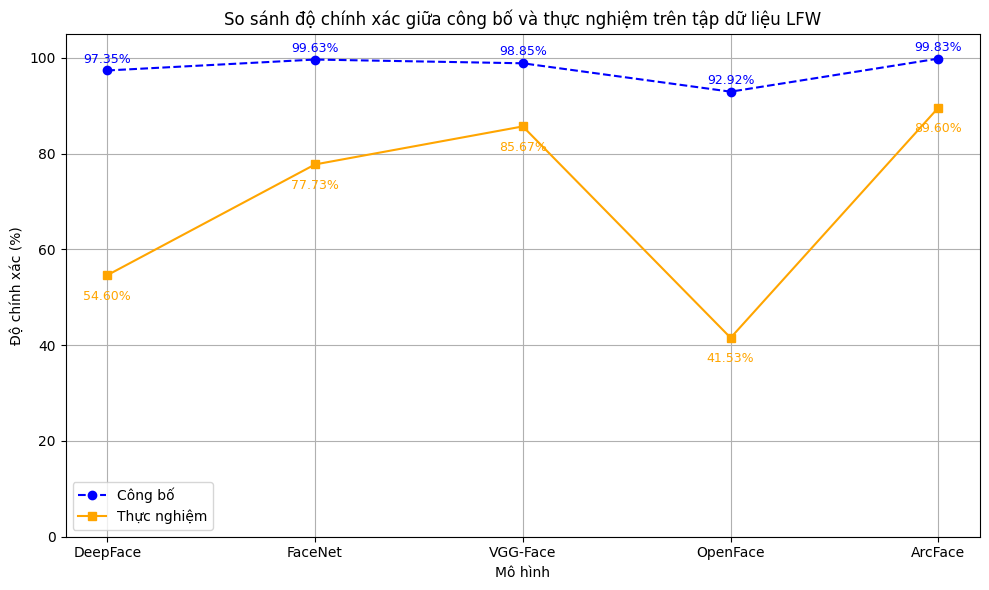

In [15]:
import matplotlib.pyplot as plt

models = ['DeepFace', 'FaceNet', 'VGG-Face', 'OpenFace', 'ArcFace']

practical_acc = [54.60, 77.73, 85.67, 41.53, 89.60]

theoretical_acc = [97.35, 99.63, 98.85, 92.92, 99.83]

plt.figure(figsize=(10, 6))
plt.plot(models, theoretical_acc, marker='o', label='Công bố', linestyle='--', color='blue')
plt.plot(models, practical_acc, marker='s', label='Thực nghiệm', linestyle='-', color='orange')

for i, acc in enumerate(theoretical_acc):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontsize=9, color='blue')
for i, acc in enumerate(practical_acc):
    plt.text(i, acc - 3, f"{acc:.2f}%", ha='center', va='top', fontsize=9, color='orange')

plt.title('So sánh độ chính xác giữa công bố và thực nghiệm trên tập dữ liệu LFW')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác (%)')
plt.ylim(0, 105)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
